# Problem 1

In [1]:
import load_helper

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import importlib

from torch import tensor

In [33]:
fname = '1.daphne'
graph = load_helper.graph_helper(fname)
%cat 1.daphne

(let [mu (sample (normal 1 (sqrt 5)))
           sigma (sqrt 2)
           lik (normal mu sigma)]
       (observe lik 8)
       (observe lik 9)
       mu)

In [24]:
import bbvi
importlib.reload(bbvi)

from bbvi import graph_bbvi_algo12

In [25]:
%%time
T=1000
L=50
lr=0.05
r, logW, sigma = bbvi.graph_bbvi_algo12(graph,T=T,L=L,lr=lr,
                                   do_log=False)

t=0, Q after step={'sample2': Normal(loc: 1.0499999523162842, scale: 2.1230359077453613)}
t=100, Q after step={'sample2': Normal(loc: 5.069911479949951, scale: 0.8730583190917969)}
t=200, Q after step={'sample2': Normal(loc: 6.814024448394775, scale: 0.8590723872184753)}
t=300, Q after step={'sample2': Normal(loc: 7.213583469390869, scale: 0.9170500636100769)}
t=400, Q after step={'sample2': Normal(loc: 7.248408794403076, scale: 0.9127773642539978)}
t=500, Q after step={'sample2': Normal(loc: 7.249967098236084, scale: 0.9128730297088623)}
t=600, Q after step={'sample2': Normal(loc: 7.249997138977051, scale: 0.9128710031509399)}
t=700, Q after step={'sample2': Normal(loc: 7.249997138977051, scale: 0.9128708243370056)}
t=800, Q after step={'sample2': Normal(loc: 7.249997138977051, scale: 0.9128709435462952)}
t=900, Q after step={'sample2': Normal(loc: 7.249997138977051, scale: 0.9128710031509399)}
CPU times: user 52.8 s, sys: 154 ms, total: 52.9 s
Wall time: 53 s


In [26]:
r = np.array(r)

probs = np.exp(logW)
probs /= probs.sum()
posterior_r = (probs * r).sum()

posterior_r2 = (probs * r**2).sum()

std_r = np.sqrt(posterior_r2 - posterior_r**2)

In [27]:
print('{} posterior mu {:1.3f} | std mu {:1.3f}'.format(fname,posterior_r,std_r))

1.daphne posterior mu 7.226 | std mu 0.897


Text(0.5, 1.0, '1.daphne  \n Best ELBO -8.20 \n T=1000 | L=50 | Adam, lr=0.05 ')

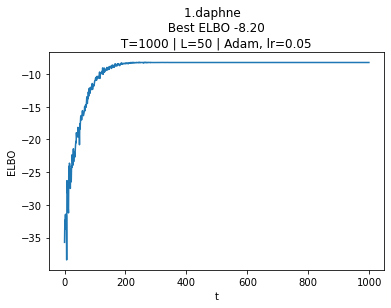

In [28]:
elbo = logW.mean(1)
pd.Series(elbo).plot()
plt.xlabel('t')
plt.ylabel('ELBO')
plt.title('{}  \n Best ELBO {:1.2f} \n T={} | L={} | Adam, lr={} '.format(fname,elbo.max(),T,L,lr))

Text(0.5, 1.0, '1.daphne  \n Best ELBO -8.20 \n T=1000 | L=50 | Adam, lr=0.05 ')

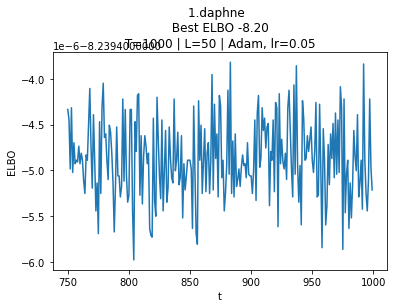

In [39]:
sr = pd.Series(elbo[-250:])
sr.index = np.arange(elbo.size-250,elbo.size)
sr.plot()
plt.xlabel('t')
plt.ylabel('ELBO')
plt.title('{}  \n Best ELBO {:1.2f} \n T={} | L={} | Adam, lr={} '.format(fname,elbo.max(),T,L,lr))

Interestingy we see that the best ELBO is not the final one. The size of the mini match L might affect the fluctuations of the ELBO over t...

Text(0.5, 1.0, '1.daphne  \n Trace \n T=1000 | L=50 | Adam, lr=0.05 ')

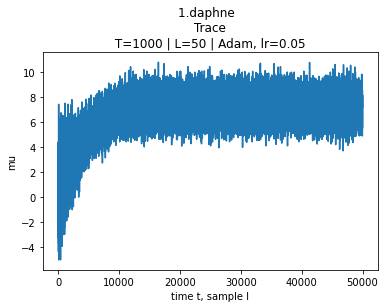

In [30]:
trace = r.flatten()
pd.Series(trace).plot()
plt.xlabel('time t, sample l')
plt.ylabel('mu')
plt.title('{}  \n Trace \n T={} | L={} | Adam, lr={} '.format(fname,T,L,lr))

In [31]:
Q = sigma['Q_best_t']
q = Q['sample2']
loc = q.loc.detach().numpy()
scale = q.scale.detach().numpy()
support = np.linspace(loc-3*scale,loc+3*scale,100)
log_pdf = np.zeros_like(support)
for idx,c in enumerate(support):
    log_pdf[idx] = q.log_prob(tensor(c))
pdf = np.exp(log_pdf)

Text(0.5, 1.0, '1.daphne \n posterior of mu (learned proposal) \n$mu \\sim \\mathcal{N}$$[loc=7.097, scale=0.909]$')

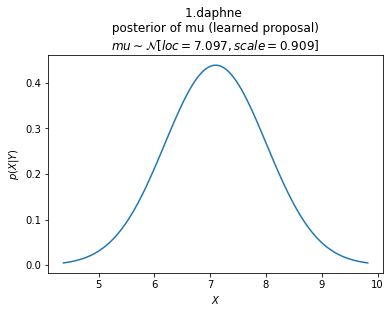

In [32]:
sr = pd.Series(pdf)
sr.index = support
sr.plot()

plt.xlabel('$X$')
plt.ylabel('$p(X|Y)$')
plt.title(\
          '{} \n posterior of mu (learned proposal) \n'.format(fname) +\
          '$mu \sim \mathcal{N}$' +\
          '$[loc={:1.3f}, scale={:1.3f}]$'.format(loc,scale)
         )